##Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [42]:
data = pd.read_csv('/content/GOOGL.csv')

In [43]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-03,41.156502,41.306499,40.967499,41.006500,41.006500,30562000
1,2017-02-06,41.046001,41.119499,40.714500,41.081001,41.081001,27018000
2,2017-02-07,41.275002,41.596001,41.164501,41.461498,41.461498,33332000
3,2017-02-08,41.526501,41.712502,41.255501,41.493999,41.493999,26044000
4,2017-02-09,41.586498,41.598999,41.325001,41.502998,41.502998,23884000


In [44]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1505,2023-01-27,97.309998,100.320000,97.309998,99.370003,99.370003,33850200
1506,2023-01-30,97.480003,98.290001,96.400002,96.940002,96.940002,27226200
1507,2023-01-31,96.870003,98.879997,96.820000,98.839996,98.839996,29870700
1508,2023-02-01,98.709999,101.190002,97.580002,100.430000,100.430000,35531100
1509,2023-02-02,105.800003,107.849998,105.610001,107.739998,107.739998,69883800


In [45]:
data.shape

(1510, 7)

In [46]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [48]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,80.019292,80.879636,79.157566,80.040381,80.040381,3.476913e+07
std,31.335766,31.685616,30.939067,31.306427,31.306427,1.566391e+07
min,41.046001,41.119499,40.714500,41.006500,41.006500,9.312000e+06
25%,55.005125,55.670374,54.331249,55.013876,55.013876,2.499400e+07
50%,66.592499,67.122997,65.714000,66.512501,66.512501,3.082400e+07
75%,103.946503,105.277499,102.796877,104.322998,104.322998,3.970700e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.331780e+08


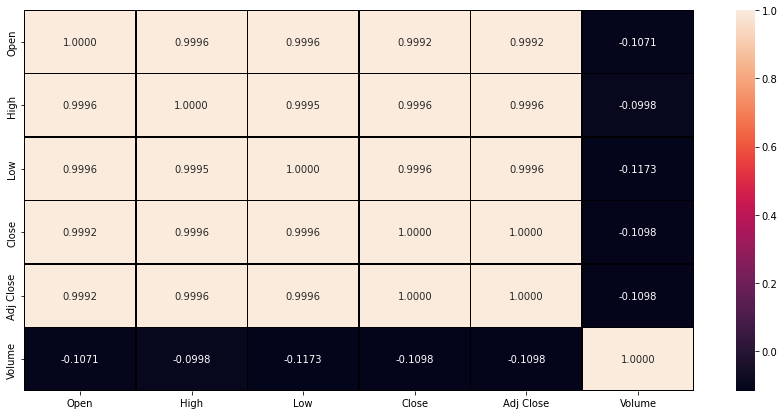

In [49]:
#Heatmap
corr =data.corr()
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,annot=True,ax=ax, linewidths=0.5, linecolor= 'black', fmt='.4f')
plt.show()

In [50]:
data_set = data.loc[:,['Open']].values
print(data_set,'\n')
len(data_set)

[[ 41.156502]
 [ 41.046001]
 [ 41.275002]
 ...
 [ 96.870003]
 [ 98.709999]
 [105.800003]] 



1510

Splitting Data for training and testing

In [51]:
train = data_set[:-50]
test = data_set[-50:]

In [52]:
train.shape

(1460, 1)

In [53]:
test.shape

(50, 1)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaler = scaler.fit_transform(train)
train_scaler

array([[0.0010027 ],
       [0.        ],
       [0.00207797],
       ...,
       [0.5158978 ],
       [0.5074589 ],
       [0.52379221]])

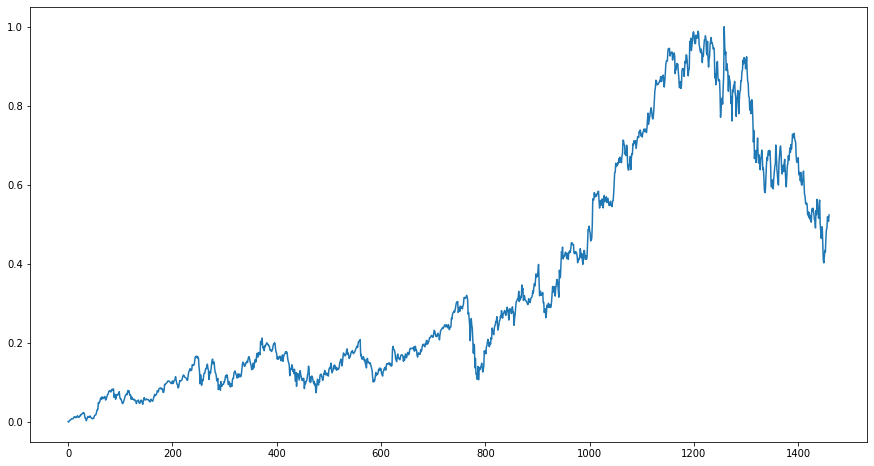

In [55]:
plt.figure(figsize=(15,8))
plt.plot(train_scaler)
plt.show()

In [56]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
  X_train.append(train_scaler[i - timesteps:i, 0])
  Y_train.append(train_scaler[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [57]:
X_train.shape

(1410, 50, 1)

In [58]:
Y_train.shape

(1410,)

##Implementing RNN(Recurrent Neural Network)

In [59]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

regressor = Sequential()

# Add the first RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation= 'tanh', return_sequences= True))
regressor.add(Dropout(0.2))

# Second RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation= 'tanh', return_sequences= True))
regressor.add(Dropout(0.2))

# Third RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation= 'tanh', return_sequences= True))
regressor.add(Dropout(0.2))

# Fourth RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Add the output Layer
regressor.add(Dense(units=1))

regressor.compile(optimizer= 'adam', loss='mean_squared_error')

regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
45/45 [==============================] - 6s 51ms/step - loss: 0.4064
Epoch 2/100
45/45 [==============================] - 3s 76ms/step - loss: 0.2307
Epoch 3/100
45/45 [==============================] - 2s 48ms/step - loss: 0.1635
Epoch 4/100
45/45 [==============================] - 3s 66ms/step - loss: 0.0990
Epoch 5/100
45/45 [==============================] - 2s 48ms/step - loss: 0.0765
Epoch 6/100
45/45 [==============================] - 2s 47ms/step - loss: 0.0631
Epoch 7/100
45/45 [==============================] - 3s 74ms/step - loss: 0.0561
Epoch 8/100
45/45 [==============================] - 2s 48ms/step - loss: 0.0441
Epoch 9/100
45/45 [==============================] - 2s 48ms/step - loss: 0.0351
Epoch 10/100
45/45 [==============================] - 2s 47ms/step - loss: 0.0288
Epoch 11/100
45/45 [==============================] - 4s 85ms/step - loss: 0.0283
Epoch 12/100
45/45 [==============================] - 3s 68ms/step - loss: 0.0249
Epoch 13/100
45/45 [=====

In [60]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [61]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
  X_test.append(inputs[i - timesteps:i, 0])

X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1],1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 0s 15ms/step


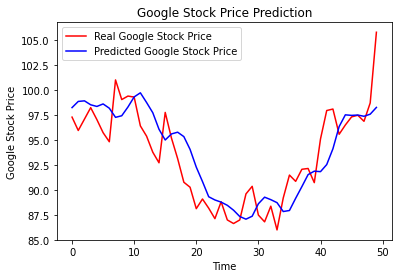

In [62]:
#visualising the results
plt.plot(test,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [63]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

##Implementing LSTM(Long short-term memory)

In [64]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,LSTM


model = Sequential()
model.add(LSTM(10,input_shape =(1, timesteps)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer ='adam')
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50
1410/1410 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 2/50
1410/1410 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 3/50
1410/1410 [==============================] - 4s 3ms/step - loss: 0.0011
Epoch 4/50
1410/1410 [==============================] - 3s 2ms/step - loss: 9.0097e-04
Epoch 5/50
1410/1410 [==============================] - 3s 2ms/step - loss: 9.5876e-04
Epoch 6/50
1410/1410 [==============================] - 3s 2ms/step - loss: 7.7786e-04
Epoch 7/50
1410/1410 [==============================] - 4s 3ms/step - loss: 8.3165e-04
Epoch 8/50
1410/1410 [==============================] - 3s 2ms/step - loss: 7.9040e-04
Epoch 9/50
1410/1410 [==============================] - 3s 2ms/step - loss: 8.8628e-04
Epoch 10/50
1410/1410 [==============================] - 3s 2ms/step - loss: 7.2155e-04
Epoch 11/50
1410/1410 [==============================] - 4s 3ms/step - loss: 7.8395e-04
Epoch 12/50
1410/1410 [==============================

In [65]:
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

2/2 [==============================] - 1s 9ms/step


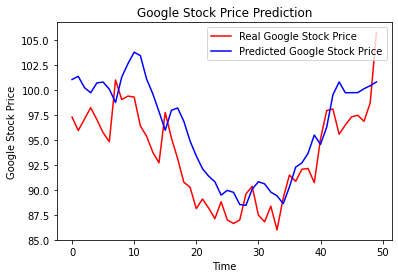

In [66]:
#visualising the results
plt.plot(test,color='red',label='Real Google Stock Price')
plt.plot(predict_lstm, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

The LSTM provides better prediction than RNN.